In [2]:
import daft
from matplotlib import rc

In [3]:
rc("font", family="serif", size=9)
rc("text", usetex=True)

## Example

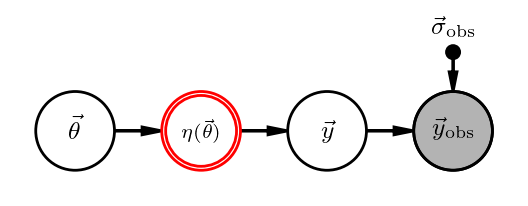

In [4]:
node_params = {'facecolor': 'white'}

# Instantiate the PGM.
pgm = daft.PGM()


# Parameters
pgm.add_node("x", r"$\vec{\theta}$", 1., 3.5, plot_params=node_params)

# Neural network
pgm.add_node('net', r'$\eta(\vec{\theta})$', 1.8, 3.5, fontsize=7,
             alternate=True,
#              shape='rectangle',
             plot_params={'edgecolor': 'red'}
            )

# Latent variables
pgm.add_node("y", r"$\vec{y}$", 2.6, 3.5, plot_params=node_params)

# Data
pgm.add_node("yobs", r"$\vec{y}_{\mathrm{obs}}$", 3.4, 3.5, observed=True)

# Uncertainties
pgm.add_node("sigma", r"$\vec{\sigma}_\mathrm{obs}$", 3.4, 4., fixed=True)

pgm.add_edge("x", "net")
pgm.add_edge("net", "y")
pgm.add_edge("y", "yobs")
pgm.add_edge("sigma", "yobs")

pgm.render(dpi=200)

## Full version

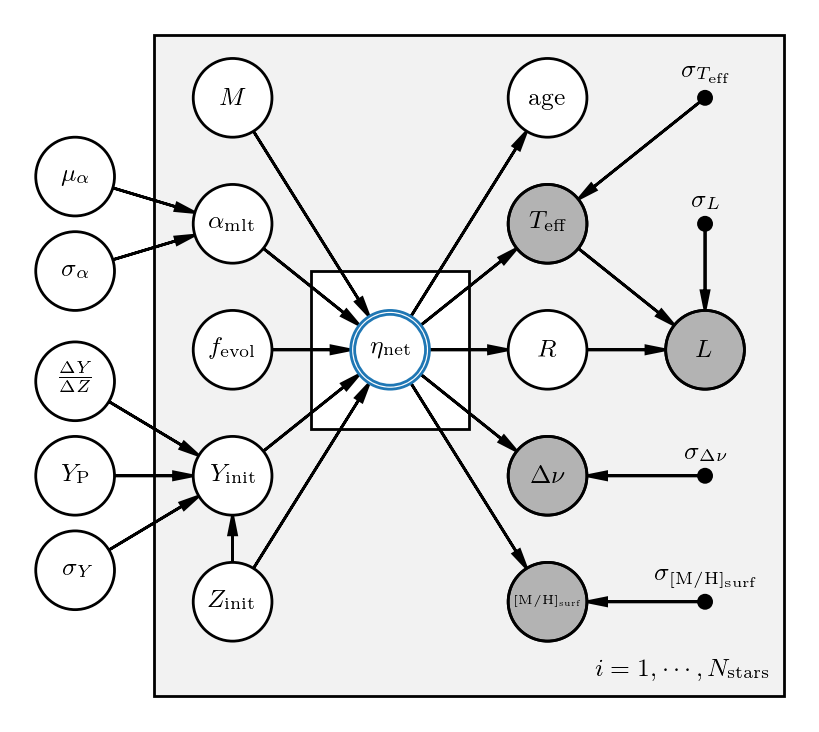

In [8]:
node_params = {'facecolor': 'white'}

# Instantiate the PGM.
pgm = daft.PGM()

# Hierarchical parameters.
pgm.add_node("dydz", r"$\frac{\Delta Y}{\Delta Z}$", 0.5, 1.8)
pgm.add_node("y_p", r"$Y_\mathrm{P}$", 0.5, 1.2)
pgm.add_node("sigma_y", r"$\sigma_Y$", 0.5, 0.6)
pgm.add_node("mu_mlt", r"$\mu_{\alpha}$", 0.5, 3.1)
pgm.add_node("sigma_mlt", r"$\sigma_{\alpha}$", 0.5, 2.5)

# Parameters
pgm.add_node("y", r"$Y_{\mathrm{init}}$", 1.5, 1.2, plot_params=node_params)
pgm.add_node("mh", r"$Z_\mathrm{init}$", 1.5, 0.4, plot_params=node_params)
pgm.add_node("mass", r"$M$", 1.5, 3.6, plot_params=node_params)
pgm.add_node("f_age", r"$f_{\mathrm{evol}}$", 1.5, 2., plot_params=node_params)
pgm.add_node("mlt", r"$\alpha_\mathrm{mlt}$", 1.5, 2.8, plot_params=node_params)

# Neural network
pgm.add_node('net', r'$\eta_\mathrm{net}$', 2.5, 2., 
#              fontsize=7,
             alternate=True,
#              shape='rectangle',
             plot_params={'edgecolor': 'C0'}
            )

# # Latent variables
# pgm.add_node("age", r"$\mathrm{age}$", 3.5, 3.6, plot_params=node_params)
# pgm.add_node("rad", r"$R$", 3.5, 2., plot_params=node_params)
# pgm.add_node("teff", r"$T_{\mathrm{eff}}$", 3.5, 2.8, plot_params=node_params)
# pgm.add_node("smh", r"$[\mathrm{M}/\mathrm{H}]_\mathrm{surf}$", 3.5, 0.4, fontsize=4.5, plot_params=node_params)
# pgm.add_node("dnu", r"$\Delta\nu$", 3.5, 1.2, plot_params=node_params)

# # Data
# pgm.add_node("olum", r"$L_{\mathrm{obs}}$", 4.5, 3.6, observed=True)
# pgm.add_node("lum", r"$L$", 4.5, 2.8, plot_params=node_params)
# pgm.add_node("oteff", r"$T_{\mathrm{eff}}^{\mathrm{obs}}$", 4.5, 2., observed=True)
# pgm.add_node("osmh", r"$[\mathrm{M}/\mathrm{H}]_\mathrm{surf}^{\mathrm{obs}}$", 4.5, 0.4, observed=True, fontsize=4.5)
# pgm.add_node("odnu", r"$\Delta\nu_{\mathrm{obs}}$", 4.5, 1.2, observed=True)

# Latent variables
pgm.add_node("age", r"$\mathrm{age}$", 3.5, 3.6, plot_params=node_params)
pgm.add_node("rad", r"$R$", 3.5, 2., plot_params=node_params)
pgm.add_node("teff", r"$T_{\mathrm{eff}}$", 3.5, 2.8, observed=True)
pgm.add_node("smh", r"$[\mathrm{M}/\mathrm{H}]_\mathrm{surf}$", 3.5, 0.4, fontsize=4.5, observed=True)
pgm.add_node("dnu", r"$\Delta\nu$", 3.5, 1.2, observed=True)
pgm.add_node("lum", r"$L$", 4.5, 2., observed=True)

# Uncertainties
pgm.add_node("olum_e", r"$\sigma_{L}$", 4.5, 2.8, fixed=True)
pgm.add_node("oteff_e", r"$\sigma_{T_{\mathrm{eff}}}$", 4.5, 3.6, fixed=True)
pgm.add_node("osmh_e", r"$\sigma_{[\mathrm{M}/\mathrm{H}]_\mathrm{surf}}$", 4.5, 0.4, fixed=True)
pgm.add_node("odnu_e", r"$\sigma_{\Delta\nu}$", 4.5, 1.2, fixed=True)

# # Add in the edges.
pgm.add_edge("dydz", "y")
pgm.add_edge("y_p", "y")
pgm.add_edge("sigma_y", "y")
pgm.add_edge("mu_mlt", "mlt")
pgm.add_edge("sigma_mlt", "mlt")
pgm.add_edge("mh", "y")

pgm.add_edge("y", "net")
pgm.add_edge("mass", "net")
pgm.add_edge("mh", "net")
pgm.add_edge("f_age", "net")
pgm.add_edge("mlt", "net")

pgm.add_edge("net", "age")
pgm.add_edge("net", "rad")
pgm.add_edge("net", "teff")
pgm.add_edge("net", "smh")
pgm.add_edge("net", "dnu")

pgm.add_edge("rad", "lum")
pgm.add_edge("teff", "lum")
# pgm.add_edge("lum", "olum")

# pgm.add_edge("teff", "oteff")
# pgm.add_edge("smh", "osmh")
# pgm.add_edge("dnu", "odnu")

pgm.add_edge("olum_e", "lum")
pgm.add_edge("oteff_e", "teff")
pgm.add_edge("osmh_e", "smh")
pgm.add_edge("odnu_e", "dnu")

# # And a plate.
pgm.add_plate([1., -0.2, 4, 4.2], label=r"$i = 1, \cdots, N_\mathrm{stars}$", shift=0, position='bottom right',
              rect_params={'facecolor': '0.95'},
             )
pgm.add_plate([2.0, 1.5, 1.0, 1.0],
              rect_params={'facecolor': 'white'},
             )

pgm.render(dpi=200)

## Small version

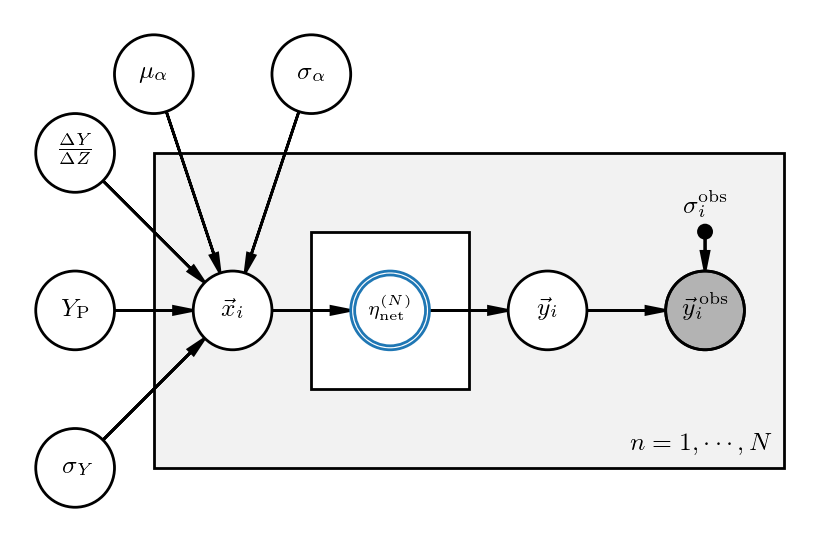

In [174]:
node_params = {'facecolor': 'white'}

# Instantiate the PGM.
pgm = daft.PGM()

# Hierarchical parameters.
pgm.add_node("dydz", r"$\frac{\Delta Y}{\Delta Z}$", 0.5, 4.5)
pgm.add_node("y_p", r"$Y_\mathrm{P}$", 0.5, 3.5)
pgm.add_node("sigma_y", r"$\sigma_Y$", 0.5, 2.5)
pgm.add_node("mu_mlt", r"$\mu_{\alpha}$", 1., 5)
pgm.add_node("sigma_mlt", r"$\sigma_{\alpha}$", 2, 5)


# Parameters
pgm.add_node("x", r"$\vec{x}_i$", 1.5, 3.5, plot_params=node_params)

# Neural network
pgm.add_node('net', r'$\eta^{(N)}_\mathrm{net}$', 2.5, 3.5, fontsize=7,
             alternate=True,
#              shape='rectangle',
             plot_params={'edgecolor': 'C0'}
            )

# Latent variables
pgm.add_node("y", r"$\vec{y}_i$", 3.5, 3.5, plot_params=node_params)

# Data
pgm.add_node("yobs", r"$\vec{y}_i^{\,\mathrm{obs}}$", 4.5, 3.5, observed=True)

# Uncertainties
pgm.add_node("sigma", r"$\sigma_i^\mathrm{obs}$", 4.5, 4., fixed=True)

# # Add in the edges.
pgm.add_edge("dydz", "x")
pgm.add_edge("y_p", "x")
pgm.add_edge("sigma_y", "x")
pgm.add_edge("mu_mlt", "x")
pgm.add_edge("sigma_mlt", "x")

pgm.add_edge("x", "net")
pgm.add_edge("net", "y")
pgm.add_edge("y", "yobs")
pgm.add_edge("sigma", "yobs")

# # And a plate.
pgm.add_plate([1., 2.5, 4, 2], label=r"$n = 1, \cdots, N$", shift=0, position='bottom} right',
              rect_params={'facecolor': '0.95'},
             )
pgm.add_plate([2.0, 3.0, 1.0, 1.0],
              rect_params={'facecolor': 'white'},
             )

pgm.render(dpi=200)